In [1]:
# Mega Case Study - Make a Hybrid Deep Learning Model

In [2]:
# Part 1 - Identify the Frauds with the Self-Organising Map

In [3]:
# Importing the libraires

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Importing the dataset

In [6]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [7]:
X = dataset.iloc[:, :15].values
y = dataset.iloc[:, 15].values

In [8]:
# Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [11]:
# Training the SOM

In [12]:
from minisom import MiniSom

In [13]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [14]:
som.random_weights_init(X)

In [15]:
som.train_random(data=X, num_iteration=100)

In [16]:
# Visualising the results

In [17]:
from pylab import bone, pcolor, colorbar, plot, show

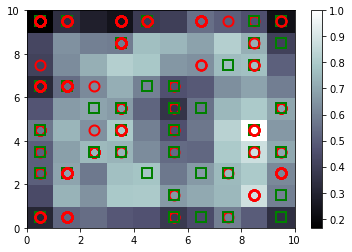

In [18]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [19]:
# Finding the frauds

In [22]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5, 4)], mappings[(8, 4)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [23]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15585892
15609356
15588123
15583680
15572390
15566495
15663194
15631693
15613699
15719940
15761158
15711742
15761733
15770995
15699963
15736399
15766734
15667934


In [24]:
frauds

array([[1.5585892e+07, 1.0000000e+00, 4.1420000e+01, 5.0000000e+00,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 5.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 4.7000000e+02, 1.0000000e+00],
       [1.5609356e+07, 1.0000000e+00, 2.0670000e+01, 1.2500000e+00,
        1.0000000e+00, 8.0000000e+00, 8.0000000e+00, 1.3750000e+00,
        1.0000000e+00, 1.0000000e+00, 3.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.4000000e+02, 2.1100000e+02],
       [1.5588123e+07, 1.0000000e+00, 3.3170000e+01, 3.0400000e+00,
        1.0000000e+00, 8.0000000e+00, 8.0000000e+00, 2.0400000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.8000000e+02, 1.8028000e+04],
       [1.5583680e+07, 1.0000000e+00, 2.3080000e+01, 1.1500000e+01,
        2.0000000e+00, 9.0000000e+00, 8.0000000e+00, 2.1250000e+00,
        1.0000000e+00, 1.0000000e+00, 1.1000000e+01, 1.0000000e+00,
        2.0000000e+00,

In [25]:
# Going from Unsupervised to Supervised Deep Learning

In [26]:
# Creating the matrix of features

In [27]:
customers = dataset.iloc[:, 1:].values

In [28]:
# Creating the dependent variable

In [29]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [30]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [34]:
# Making the ANN

In [37]:
from keras.models import Sequential
from keras.layers import Dense

In [38]:
# Initializing the ANN
classifier = Sequential()

In [39]:
# Adding the input layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_shape=(15,)))

In [40]:
# Adding the output layer
classifier.add(Dense(units = 1 , kernel_initializer = 'uniform' , activation = 'sigmoid'))

In [41]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [43]:
# Fitting the ANN to the training set
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 3s 5ms/step - loss: 0.1226 - accuracy: 0.9739
Epoch 2/2
690/690 [==============================] - 3s 4ms/step - loss: 0.1078 - accuracy: 0.9739


In [45]:
# Predicting the probabilities of frauds

In [46]:
y_pred = classifier.predict(customers)

In [48]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)

In [50]:
y_pred = y_pred[y_pred[:, 1].argsort()]

In [51]:
y_pred

array([[1.57901130e+07, 6.80059195e-04],
       [1.56458200e+07, 1.59871578e-03],
       [1.57781420e+07, 4.79856133e-03],
       ...,
       [1.56316930e+07, 1.20544940e-01],
       [1.55723610e+07, 1.21012479e-01],
       [1.55881230e+07, 1.41219407e-01]])